In [84]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

from pandas.plotting import autocorrelation_plot
from pylab import pcolor, show, colorbar, xticks, yticks

## Read data, clean, and create subsets by province

In [85]:
data1 = pd.read_csv('23100242.csv')
data1.head()

,REF_DATE,GEO,DGUID,Expenditures and revenues,Mode of transportation,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2006/2007,Canada,2016A000011124,Total expenses: (Gross) federal plus (Net) pro...,All modes of transportation,Dollars,81,millions,6,v123218878,1.1.1,17397.7,NaN,NaN,NaN,1
1,2006/2007,Canada,2016A000011124,Total expenses: (Gross) federal plus (Net) pro...,Air transport,Dollars,81,millions,6,v123218879,1.1.2,830.5,NaN,NaN,NaN,1
2,2006/2007,Canada,2016A000011124,Total expenses: (Gross) federal plus (Net) pro...,Marine transport,Dollars,81,millions,6,v123218880,1.1.3,1353.1,NaN,NaN,NaN,1
3,2006/2007,Canada,2016A000011124,Total expenses: (Gross) federal plus (Net) pro...,Rail transport,Dollars,81,millions,6,v123218881,1.1.4,230.1,NaN,NaN,NaN,1
4,2006/2007,Canada,2016A000011124,Total expenses: (Gross) federal plus (Net) pro...,Road transport,Dollars,81,millions,6,v123218882,1.1.5,10510.0,NaN,NaN,NaN,1


In [86]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 16 columns):
REF_DATE                     490 non-null object
GEO                          490 non-null object
DGUID                        490 non-null object
Expenditures and revenues    490 non-null object
Mode of transportation       490 non-null object
UOM                          490 non-null object
UOM_ID                       490 non-null int64
SCALAR_FACTOR                490 non-null object
SCALAR_ID                    490 non-null int64
VECTOR                       490 non-null object
COORDINATE                   490 non-null object
VALUE                        480 non-null float64
STATUS                       10 non-null object
SYMBOL                       0 non-null float64
TERMINATED                   0 non-null float64
DECIMALS                     490 non-null int64
dtypes: float64(3), int64(3), object(10)
memory usage: 61.4+ KB


In [87]:
data1.drop(['DGUID','UOM_ID','VECTOR','STATUS',
            'SYMBOL','TERMINATED','DECIMALS'],axis=1, inplace = True)
data1

,REF_DATE,GEO,Expenditures and revenues,Mode of transportation,UOM,SCALAR_FACTOR,SCALAR_ID,COORDINATE,VALUE
0,2006/2007,Canada,Total expenses: (Gross) federal plus (Net) pro...,All modes of transportation,Dollars,millions,6,1.1.1,17397.7
1,2006/2007,Canada,Total expenses: (Gross) federal plus (Net) pro...,Air transport,Dollars,millions,6,1.1.2,830.5
2,2006/2007,Canada,Total expenses: (Gross) federal plus (Net) pro...,Marine transport,Dollars,millions,6,1.1.3,1353.1
3,2006/2007,Canada,Total expenses: (Gross) federal plus (Net) pro...,Rail transport,Dollars,millions,6,1.1.4,230.1
4,2006/2007,Canada,Total expenses: (Gross) federal plus (Net) pro...,Road transport,Dollars,millions,6,1.1.5,10510.0
...,...,...,...,...,...,...,...,...,...
485,2015/2016,Canada,Provincial and territorial revenues,Marine transport,Dollars,millions,6,1.7.3,20.8
486,2015/2016,Canada,Provincial and territorial revenues,Rail transport,Dollars,millions,6,1.7.4,11.2
487,2015/2016,Canada,Provincial and territorial revenues,Road transport,Dollars,millions,6,1.7.5,24010.7
488,2015/2016,Canada,Provincial and territorial revenues,Public transport,Dollars,millions,6,1.7.6,1129.2


In [88]:
df_Expen = data1[data1['Expenditures and revenues'].str.match('Total expenses')]
df_Expen

,REF_DATE,GEO,Expenditures and revenues,Mode of transportation,UOM,SCALAR_FACTOR,SCALAR_ID,COORDINATE,VALUE
0,2006/2007,Canada,Total expenses: (Gross) federal plus (Net) pro...,All modes of transportation,Dollars,millions,6,1.1.1,17397.7
1,2006/2007,Canada,Total expenses: (Gross) federal plus (Net) pro...,Air transport,Dollars,millions,6,1.1.2,830.5
2,2006/2007,Canada,Total expenses: (Gross) federal plus (Net) pro...,Marine transport,Dollars,millions,6,1.1.3,1353.1
3,2006/2007,Canada,Total expenses: (Gross) federal plus (Net) pro...,Rail transport,Dollars,millions,6,1.1.4,230.1
4,2006/2007,Canada,Total expenses: (Gross) federal plus (Net) pro...,Road transport,Dollars,millions,6,1.1.5,10510.0
...,...,...,...,...,...,...,...,...,...
443,2015/2016,Canada,Total expenses: (Gross) federal plus (Net) pro...,Marine transport,Dollars,millions,6,1.1.3,2529.3
444,2015/2016,Canada,Total expenses: (Gross) federal plus (Net) pro...,Rail transport,Dollars,millions,6,1.1.4,590.2
445,2015/2016,Canada,Total expenses: (Gross) federal plus (Net) pro...,Road transport,Dollars,millions,6,1.1.5,15921.6
446,2015/2016,Canada,Total expenses: (Gross) federal plus (Net) pro...,Public transport,Dollars,millions,6,1.1.6,8849.9


In [89]:
df_Expen_All=df_Expen[df_Expen['Mode of transportation'].str.match('All modes')]
df_Expen_All

,REF_DATE,GEO,Expenditures and revenues,Mode of transportation,UOM,SCALAR_FACTOR,SCALAR_ID,COORDINATE,VALUE
0,2006/2007,Canada,Total expenses: (Gross) federal plus (Net) pro...,All modes of transportation,Dollars,millions,6,1.1.1,17397.7
49,2007/2008,Canada,Total expenses: (Gross) federal plus (Net) pro...,All modes of transportation,Dollars,millions,6,1.1.1,21143.4
98,2008/2009,Canada,Total expenses: (Gross) federal plus (Net) pro...,All modes of transportation,Dollars,millions,6,1.1.1,21857.7
147,2009/2010,Canada,Total expenses: (Gross) federal plus (Net) pro...,All modes of transportation,Dollars,millions,6,1.1.1,21052.3
196,2010/2011,Canada,Total expenses: (Gross) federal plus (Net) pro...,All modes of transportation,Dollars,millions,6,1.1.1,22496.7
245,2011/2012,Canada,Total expenses: (Gross) federal plus (Net) pro...,All modes of transportation,Dollars,millions,6,1.1.1,21071.8
294,2012/2013,Canada,Total expenses: (Gross) federal plus (Net) pro...,All modes of transportation,Dollars,millions,6,1.1.1,24263.1
343,2013/2014,Canada,Total expenses: (Gross) federal plus (Net) pro...,All modes of transportation,Dollars,millions,6,1.1.1,27376.3
392,2014/2015,Canada,Total expenses: (Gross) federal plus (Net) pro...,All modes of transportation,Dollars,millions,6,1.1.1,27580.1
441,2015/2016,Canada,Total expenses: (Gross) federal plus (Net) pro...,All modes of transportation,Dollars,millions,6,1.1.1,30644.9


Provincial revenue from 2007-2016
https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=3610045001#timeframe

In [90]:
Revenue = pd.read_csv('Revenue_per_province.csv')
Revenue.head(10)

,Rev,Canada,Canada.1,Canada.2,Canada.3,Canada.4,Canada.5,Canada.6,Canada.7,Canada.8,...,NU,NU.1,NU.2,NU.3,NU.4,NU.5,NU.6,NU.7,NU.8,NU.9
0,Estimates,2007,2008,2009,2010,2011,2012,2013,2014,2015,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,General governments revenue,"636,408","645,580","621,296","638,536","678,872","701,676","731,719","768,941","795,312",...,435,411,441,503,568,585,591,626,652,691
2,Taxes on incomes,"256,729","259,162","243,242","242,346","260,801","271,934","283,094","301,620","316,486",...,176,144,172,187,224,223,217,218,225,234
3,From households,"194,551","197,448","184,925","181,664","197,919","208,251","214,907","227,362","241,166",...,157,117,143,149,171,164,169,176,186,188
4,Income taxes,"194,373","197,270","184,744","181,486","197,714","208,054","214,686","227,139","240,898",...,157,117,143,149,171,164,169,176,186,188
5,Wealth transfer taxes,178,178,181,178,205,197,221,223,268,...,0,0,0,0,0,0,0,0,0,0
6,From corporations and government business ente...,"55,284","54,760","53,319","55,163","57,374","58,683","62,813","67,613","68,677",...,17,24,26,35,49,55,44,38,36,42
7,From non-residents (withholding taxes),"6,894","6,954","4,998","5,519","5,508","5,000","5,374","6,645","6,643",...,2,3,3,3,4,4,4,4,3,4
8,Contributions to social insurance plans,"72,535","74,008","75,390","75,712","79,419","84,763","89,225","92,158","95,617",...,52,54,60,62,66,70,75,78,82,96
9,Of which: employer and employee contributions ...,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [91]:
Revenue.drop(['Rev'],axis=1, inplace = True)
Revenue

,Canada,Canada.1,Canada.2,Canada.3,Canada.4,Canada.5,Canada.6,Canada.7,Canada.8,Canada.9,...,NU,NU.1,NU.2,NU.3,NU.4,NU.5,NU.6,NU.7,NU.8,NU.9
0,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,"636,408","645,580","621,296","638,536","678,872","701,676","731,719","768,941","795,312","816,288",...,435,411,441,503,568,585,591,626,652,691
2,"256,729","259,162","243,242","242,346","260,801","271,934","283,094","301,620","316,486","325,829",...,176,144,172,187,224,223,217,218,225,234
3,"194,551","197,448","184,925","181,664","197,919","208,251","214,907","227,362","241,166","242,139",...,157,117,143,149,171,164,169,176,186,188
4,"194,373","197,270","184,744","181,486","197,714","208,054","214,686","227,139","240,898","241,879",...,157,117,143,149,171,164,169,176,186,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
Rev_tot=Revenue[0:2]
Rev_tot

,Canada,Canada.1,Canada.2,Canada.3,Canada.4,Canada.5,Canada.6,Canada.7,Canada.8,Canada.9,...,NU,NU.1,NU.2,NU.3,NU.4,NU.5,NU.6,NU.7,NU.8,NU.9
0,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,"636,408","645,580","621,296","638,536","678,872","701,676","731,719","768,941","795,312","816,288",...,435,411,441,503,568,585,591,626,652,691


In [93]:
Rev_tot_T = Rev_tot.T
Rev_tot_T.head(10)

,0,1
Canada,2007,"636,408"
Canada.1,2008,"645,580"
Canada.2,2009,"621,296"
Canada.3,2010,"638,536"
Canada.4,2011,"678,872"
Canada.5,2012,"701,676"
Canada.6,2013,"731,719"
Canada.7,2014,"768,941"
Canada.8,2015,"795,312"
Canada.9,2016,"816,288"


In [94]:
Rev_tot_T.columns = ['Year','Revenue']
Rev_tot_T.head(10)

,Year,Revenue
Canada,2007,"636,408"
Canada.1,2008,"645,580"
Canada.2,2009,"621,296"
Canada.3,2010,"638,536"
Canada.4,2011,"678,872"
Canada.5,2012,"701,676"
Canada.6,2013,"731,719"
Canada.7,2014,"768,941"
Canada.8,2015,"795,312"
Canada.9,2016,"816,288"


In [95]:
Rev_Fed=Rev_tot_T[0:9]
Rev_Fed.set_index('Year',inplace=True)
Rev_Fed

,Revenue
Year,
2007,"636,408"
2008,"645,580"
2009,"621,296"
2010,"638,536"
2011,"678,872"
2012,"701,676"
2013,"731,719"
2014,"768,941"
2015,"795,312"


In [96]:
Rev_NL=Rev_tot_T[10:19]
Rev_NL.set_index('Year',inplace=True)
Rev_NL

,Revenue
Year,
2007,"8,952"
2008,"10,676"
2009,"9,805"
2010,"10,876"
2011,"12,341"
2012,"11,629"
2013,"12,023"
2014,"12,182"
2015,"11,522"


In [97]:
Rev_PE=Rev_tot_T[20:29]
Rev_PE.set_index('Year',inplace=True)
Rev_PE

,Revenue
Year,
2007,"2,009"
2008,"1,979"
2009,"2,029"
2010,"2,044"
2011,"2,154"
2012,"2,247"
2013,"2,324"
2014,"2,369"
2015,"2,456"


In [98]:
Rev_NS=Rev_tot_T[30:39]
Rev_NS.set_index('Year',inplace=True)
Rev_NS

,Revenue
Year,
2007,"14,940"
2008,"14,932"
2009,"15,096"
2010,"15,366"
2011,"16,112"
2012,"16,473"
2013,"16,803"
2014,"17,454"
2015,"18,091"


In [99]:
Rev_NB=Rev_tot_T[40:49]
Rev_NB.set_index('Year',inplace=True)
Rev_NB

,Revenue
Year,
2007,"10,972"
2008,"11,246"
2009,"11,275"
2010,"11,421"
2011,"11,918"
2012,"12,159"
2013,"12,494"
2014,"12,952"
2015,"13,332"


In [100]:
Rev_PQ=Rev_tot_T[50:59]
Rev_PQ.set_index('Year',inplace=True)
Rev_PQ

,Revenue
Year,
2007,"139,973"
2008,"140,200"
2009,"138,970"
2010,"144,199"
2011,"153,799"
2012,"159,522"
2013,"165,563"
2014,"170,970"
2015,"178,126"


In [101]:
Rev_ON=Rev_tot_T[60:69]
Rev_ON.set_index('Year',inplace=True)
Rev_ON

,Revenue
Year,
2007,"244,453"
2008,"240,201"
2009,"235,360"
2010,"239,371"
2011,"253,784"
2012,"262,612"
2013,"269,867"
2014,"283,800"
2015,"302,791"


In [102]:
Rev_MB=Rev_tot_T[70:79]
Rev_MB.set_index('Year',inplace=True)
Rev_MB

,Revenue
Year,
2007,"19,727"
2008,"19,997"
2009,"19,852"
2010,"20,217"
2011,"21,246"
2012,"22,420"
2013,"23,775"
2014,"24,621"
2015,"25,766"


In [103]:
Rev_SK=Rev_tot_T[80:89]
Rev_SK.set_index('Year',inplace=True)
Rev_SK

,Revenue
Year,
2007,"21,215"
2008,"24,093"
2009,"22,029"
2010,"22,798"
2011,"24,233"
2012,"25,858"
2013,"26,795"
2014,"27,779"
2015,"27,743"


In [104]:
Rev_AB=Rev_tot_T[90:99]
Rev_AB.set_index('Year',inplace=True)
Rev_AB

,Revenue
Year,
2007,"91,796"
2008,"99,042"
2009,"87,627"
2010,"90,871"
2011,"97,190"
2012,"99,714"
2013,"109,154"
2014,"118,108"
2015,"111,730"


In [105]:
Rev_BC=Rev_tot_T[100:109]
Rev_BC.set_index('Year',inplace=True)
Rev_BC

,Revenue
Year,
2007,"79,823"
2008,"80,534"
2009,"76,616"
2010,"78,734"
2011,"83,169"
2012,"86,137"
2013,"90,053"
2014,"95,729"
2015,"100,735"


In [106]:
Rev_YK=Rev_tot_T[110:119]
Rev_YK.set_index('Year',inplace=True)
Rev_YK

,Revenue
Year,
2007,559
2008,589
2009,597
2010,609
2011,673
2012,691
2013,725
2014,708
2015,714


In [107]:
Rev_NW=Rev_tot_T[120:129]
Rev_NW.set_index('Year',inplace=True)
Rev_NW

,Revenue
Year,
2007,"1,339"
2008,"1,399"
2009,"1,315"
2010,"1,317"
2011,"1,495"
2012,"1,446"
2013,"1,376"
2014,"1,463"
2015,"1,464"


In [108]:
Rev_NU=Rev_tot_T[130:139]
Rev_NU.set_index('Year',inplace=True)
Rev_NU

,Revenue
Year,
2007,435
2008,411
2009,441
2010,503
2011,568
2012,585
2013,591
2014,626
2015,652


Transportation support by province

In [109]:
data2 = pd.read_csv('23100248.csv')
data2

,REF_DATE,GEO,DGUID,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2006/2007,Canada,2016A000011124,Transport expenditures,Dollars,81,millions,6,v123220273,1.1,13619.0,NaN,NaN,NaN,1
1,2006/2007,Canada,2016A000011124,Population,Persons,249,thousands,3,v123220274,1.2,32679.0,NaN,NaN,NaN,1
2,2006/2007,Canada,2016A000011124,Per capita transport expenditures,Dollars,81,units,0,v123220275,1.3,416.8,NaN,NaN,NaN,1
3,2006/2007,Newfoundland and Labrador,2016A000210,Transport expenditures,Dollars,81,millions,6,v123220276,2.1,280.3,NaN,NaN,NaN,1
4,2006/2007,Newfoundland and Labrador,2016A000210,Population,Persons,249,thousands,3,v123220277,2.2,510.3,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2015/2016,Northwest Territories,2016A000261,Population,Persons,249,thousands,3,v123220310,13.2,44.4,NaN,NaN,NaN,1
416,2015/2016,Northwest Territories,2016A000261,Per capita transport expenditures,Dollars,81,units,0,v123220311,13.3,7317.8,NaN,NaN,NaN,1
417,2015/2016,Nunavut,2016A000262,Transport expenditures,Dollars,81,millions,6,v123220312,14.1,126.6,NaN,NaN,NaN,1
418,2015/2016,Nunavut,2016A000262,Population,Persons,249,thousands,3,v123220313,14.2,36.7,NaN,NaN,NaN,1


In [110]:
data2.drop(['SCALAR_ID','DGUID','UOM_ID','VECTOR','COORDINATE','STATUS','SYMBOL',
                      'TERMINATED','DECIMALS'], axis = 1,inplace = True)
data2

,REF_DATE,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
0,2006/2007,Canada,Transport expenditures,Dollars,millions,13619.0
1,2006/2007,Canada,Population,Persons,thousands,32679.0
2,2006/2007,Canada,Per capita transport expenditures,Dollars,units,416.8
3,2006/2007,Newfoundland and Labrador,Transport expenditures,Dollars,millions,280.3
4,2006/2007,Newfoundland and Labrador,Population,Persons,thousands,510.3
...,...,...,...,...,...,...
415,2015/2016,Northwest Territories,Population,Persons,thousands,44.4
416,2015/2016,Northwest Territories,Per capita transport expenditures,Dollars,units,7317.8
417,2015/2016,Nunavut,Transport expenditures,Dollars,millions,126.6
418,2015/2016,Nunavut,Population,Persons,thousands,36.7


In [111]:
Expen_All= data2[data2['Statistics'].str.match('Transport expenditures')]
Expen_All.head(20)                                    

,REF_DATE,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
0,2006/2007,Canada,Transport expenditures,Dollars,millions,13619.0
3,2006/2007,Newfoundland and Labrador,Transport expenditures,Dollars,millions,280.3
6,2006/2007,Prince Edward Island,Transport expenditures,Dollars,millions,92.2
9,2006/2007,Nova Scotia,Transport expenditures,Dollars,millions,397.5
12,2006/2007,New Brunswick,Transport expenditures,Dollars,millions,428.2
15,2006/2007,Quebec,Transport expenditures,Dollars,millions,3485.8
18,2006/2007,Ontario,Transport expenditures,Dollars,millions,4098.2
21,2006/2007,Manitoba,Transport expenditures,Dollars,millions,368.9
24,2006/2007,Saskatchewan,Transport expenditures,Dollars,millions,346.8
27,2006/2007,Alberta,Transport expenditures,Dollars,millions,1403.4


In [112]:
Expen_All_07=Expen_All[14:140]#because I don't have data for 2006 revenue, so dropped 06 data
Expen_All_07

,REF_DATE,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
42,2007/2008,Canada,Transport expenditures,Dollars,millions,16749.8
45,2007/2008,Newfoundland and Labrador,Transport expenditures,Dollars,millions,305.0
48,2007/2008,Prince Edward Island,Transport expenditures,Dollars,millions,106.4
51,2007/2008,Nova Scotia,Transport expenditures,Dollars,millions,356.8
54,2007/2008,New Brunswick,Transport expenditures,Dollars,millions,925.9
...,...,...,...,...,...,...
405,2015/2016,Alberta,Transport expenditures,Dollars,millions,2489.5
408,2015/2016,British Columbia,Transport expenditures,Dollars,millions,2337.5
411,2015/2016,Yukon,Transport expenditures,Dollars,millions,137.0
414,2015/2016,Northwest Territories,Transport expenditures,Dollars,millions,324.9


In [113]:
Expen_All_07['REF_DATE'].replace({"2007/2008":"2007","2008/2009":"2008","2009/2010":"2009",
                                 "2010/2011":"2010","2011/2012":"2011","2012/2013":"2012",
                                 "2013/2014":"2013","2014/2015":"2014","2015/2016":"2015"},inplace=True)
Expen_All_07

C:\Users\totoxixi\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,REF_DATE,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
42,2007,Canada,Transport expenditures,Dollars,millions,16749.8
45,2007,Newfoundland and Labrador,Transport expenditures,Dollars,millions,305.0
48,2007,Prince Edward Island,Transport expenditures,Dollars,millions,106.4
51,2007,Nova Scotia,Transport expenditures,Dollars,millions,356.8
54,2007,New Brunswick,Transport expenditures,Dollars,millions,925.9
...,...,...,...,...,...,...
405,2015,Alberta,Transport expenditures,Dollars,millions,2489.5
408,2015,British Columbia,Transport expenditures,Dollars,millions,2337.5
411,2015,Yukon,Transport expenditures,Dollars,millions,137.0
414,2015,Northwest Territories,Transport expenditures,Dollars,millions,324.9


In [114]:
Expen_NL = Expen_All_07[Expen_All_07['GEO'].str.match('Newfoundland')]
Expen_NL.set_index('REF_DATE',inplace=True)
Expen_NL.index.names=['Year']
Expen_NL

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Newfoundland and Labrador,Transport expenditures,Dollars,millions,305.0
2008,Newfoundland and Labrador,Transport expenditures,Dollars,millions,409.2
2009,Newfoundland and Labrador,Transport expenditures,Dollars,millions,444.9
2010,Newfoundland and Labrador,Transport expenditures,Dollars,millions,512.2
2011,Newfoundland and Labrador,Transport expenditures,Dollars,millions,476.3
2012,Newfoundland and Labrador,Transport expenditures,Dollars,millions,395.6
2013,Newfoundland and Labrador,Transport expenditures,Dollars,millions,395.6
2014,Newfoundland and Labrador,Transport expenditures,Dollars,millions,429.5
2015,Newfoundland and Labrador,Transport expenditures,Dollars,millions,422.4


In [115]:
Expen_PE = Expen_All_07[Expen_All_07['GEO'].str.match('Prince')]
Expen_PE.set_index('REF_DATE',inplace=True)
Expen_PE.index.names=['Year']
Expen_PE

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Prince Edward Island,Transport expenditures,Dollars,millions,106.4
2008,Prince Edward Island,Transport expenditures,Dollars,millions,114.0
2009,Prince Edward Island,Transport expenditures,Dollars,millions,124.6
2010,Prince Edward Island,Transport expenditures,Dollars,millions,121.8
2011,Prince Edward Island,Transport expenditures,Dollars,millions,127.1
2012,Prince Edward Island,Transport expenditures,Dollars,millions,121.7
2013,Prince Edward Island,Transport expenditures,Dollars,millions,108.8
2014,Prince Edward Island,Transport expenditures,Dollars,millions,114.9
2015,Prince Edward Island,Transport expenditures,Dollars,millions,119.4


In [116]:
Expen_NS = Expen_All_07[Expen_All_07['GEO'].str.match('Nova')]
Expen_NS.set_index('REF_DATE',inplace=True)
Expen_NS.index.names=['Year']
Expen_NS

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Nova Scotia,Transport expenditures,Dollars,millions,356.8
2008,Nova Scotia,Transport expenditures,Dollars,millions,408.1
2009,Nova Scotia,Transport expenditures,Dollars,millions,420.9
2010,Nova Scotia,Transport expenditures,Dollars,millions,520.3
2011,Nova Scotia,Transport expenditures,Dollars,millions,602.5
2012,Nova Scotia,Transport expenditures,Dollars,millions,603.5
2013,Nova Scotia,Transport expenditures,Dollars,millions,624.6
2014,Nova Scotia,Transport expenditures,Dollars,millions,653.6
2015,Nova Scotia,Transport expenditures,Dollars,millions,653.6


In [117]:
Expen_NB= Expen_All_07[Expen_All_07['GEO'].str.match('New Brunswick')]
Expen_NB.set_index('REF_DATE',inplace=True)
Expen_NB.index.names=['Year']
Expen_NB

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,New Brunswick,Transport expenditures,Dollars,millions,925.9
2008,New Brunswick,Transport expenditures,Dollars,millions,533.0
2009,New Brunswick,Transport expenditures,Dollars,millions,559.8
2010,New Brunswick,Transport expenditures,Dollars,millions,629.2
2011,New Brunswick,Transport expenditures,Dollars,millions,441.8
2012,New Brunswick,Transport expenditures,Dollars,millions,900.5
2013,New Brunswick,Transport expenditures,Dollars,millions,391.9
2014,New Brunswick,Transport expenditures,Dollars,millions,411.2
2015,New Brunswick,Transport expenditures,Dollars,millions,506.5


In [118]:
Expen_PQ = Expen_All_07[Expen_All_07['GEO'].str.match('Quebec')]
Expen_PQ.set_index('REF_DATE',inplace=True)
Expen_PQ.index.names=['Year']
Expen_PQ

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Quebec,Transport expenditures,Dollars,millions,4139.4
2008,Quebec,Transport expenditures,Dollars,millions,5335.1
2009,Quebec,Transport expenditures,Dollars,millions,4606.3
2010,Quebec,Transport expenditures,Dollars,millions,4994.8
2011,Quebec,Transport expenditures,Dollars,millions,5259.0
2012,Quebec,Transport expenditures,Dollars,millions,7100.5
2013,Quebec,Transport expenditures,Dollars,millions,10005.8
2014,Quebec,Transport expenditures,Dollars,millions,9604.6
2015,Quebec,Transport expenditures,Dollars,millions,10281.1


In [119]:
Expen_ON = Expen_All_07[Expen_All_07['GEO'].str.match('Ontario')]
Expen_ON.set_index('REF_DATE',inplace=True)
Expen_ON.index.names=['Year']
Expen_ON

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Ontario,Transport expenditures,Dollars,millions,5058.8
2008,Ontario,Transport expenditures,Dollars,millions,4084.0
2009,Ontario,Transport expenditures,Dollars,millions,2521.4
2010,Ontario,Transport expenditures,Dollars,millions,2521.3
2011,Ontario,Transport expenditures,Dollars,millions,2641.2
2012,Ontario,Transport expenditures,Dollars,millions,4164.4
2013,Ontario,Transport expenditures,Dollars,millions,4330.7
2014,Ontario,Transport expenditures,Dollars,millions,4647.1
2015,Ontario,Transport expenditures,Dollars,millions,5339.9


In [120]:
Expen_SK = Expen_All_07[Expen_All_07['GEO'].str.match('Sas')]
Expen_SK.set_index('REF_DATE',inplace=True)
Expen_SK.index.names=['Year']
Expen_SK

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Saskatchewan,Transport expenditures,Dollars,millions,439.4
2008,Saskatchewan,Transport expenditures,Dollars,millions,598.7
2009,Saskatchewan,Transport expenditures,Dollars,millions,574.7
2010,Saskatchewan,Transport expenditures,Dollars,millions,599.0
2011,Saskatchewan,Transport expenditures,Dollars,millions,598.4
2012,Saskatchewan,Transport expenditures,Dollars,millions,582.6
2013,Saskatchewan,Transport expenditures,Dollars,millions,626.7
2014,Saskatchewan,Transport expenditures,Dollars,millions,693.7
2015,Saskatchewan,Transport expenditures,Dollars,millions,790.9


In [121]:
Expen_MB = Expen_All_07[Expen_All_07['GEO'].str.match('Mani')]
Expen_MB.set_index('REF_DATE',inplace=True)
Expen_MB.index.names=['Year']
Expen_MB

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Manitoba,Transport expenditures,Dollars,millions,511.3
2008,Manitoba,Transport expenditures,Dollars,millions,540.8
2009,Manitoba,Transport expenditures,Dollars,millions,662.2
2010,Manitoba,Transport expenditures,Dollars,millions,591.0
2011,Manitoba,Transport expenditures,Dollars,millions,582.6
2012,Manitoba,Transport expenditures,Dollars,millions,602.7
2013,Manitoba,Transport expenditures,Dollars,millions,646.4
2014,Manitoba,Transport expenditures,Dollars,millions,810.4
2015,Manitoba,Transport expenditures,Dollars,millions,943.0


In [122]:
Expen_AB = Expen_All_07[Expen_All_07['GEO'].str.match('Alb')]
Expen_AB.set_index('REF_DATE',inplace=True)
Expen_AB.index.names=['Year']
Expen_AB

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Alberta,Transport expenditures,Dollars,millions,1937.9
2008,Alberta,Transport expenditures,Dollars,millions,2330.4
2009,Alberta,Transport expenditures,Dollars,millions,3160.1
2010,Alberta,Transport expenditures,Dollars,millions,2684.9
2011,Alberta,Transport expenditures,Dollars,millions,2724.0
2012,Alberta,Transport expenditures,Dollars,millions,2588.1
2013,Alberta,Transport expenditures,Dollars,millions,2404.4
2014,Alberta,Transport expenditures,Dollars,millions,2252.5
2015,Alberta,Transport expenditures,Dollars,millions,2489.5


In [123]:
Expen_BC = Expen_All_07[Expen_All_07['GEO'].str.match('British')]
Expen_BC.set_index('REF_DATE',inplace=True)
Expen_BC.index.names=['Year']
Expen_BC

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,British Columbia,Transport expenditures,Dollars,millions,2726.2
2008,British Columbia,Transport expenditures,Dollars,millions,2224.0
2009,British Columbia,Transport expenditures,Dollars,millions,2306.5
2010,British Columbia,Transport expenditures,Dollars,millions,2668.8
2011,British Columbia,Transport expenditures,Dollars,millions,2297.0
2012,British Columbia,Transport expenditures,Dollars,millions,2371.0
2013,British Columbia,Transport expenditures,Dollars,millions,2448.5
2014,British Columbia,Transport expenditures,Dollars,millions,2286.8
2015,British Columbia,Transport expenditures,Dollars,millions,2337.5


In [124]:
Expen_YK = Expen_All_07[Expen_All_07['GEO'].str.match('Yukon')]
Expen_YK.set_index('REF_DATE',inplace=True)
Expen_YK.index.names=['Year']
Expen_YK

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Yukon,Transport expenditures,Dollars,millions,96.3
2008,Yukon,Transport expenditures,Dollars,millions,107.6
2009,Yukon,Transport expenditures,Dollars,millions,116.3
2010,Yukon,Transport expenditures,Dollars,millions,99.7
2011,Yukon,Transport expenditures,Dollars,millions,99.3
2012,Yukon,Transport expenditures,Dollars,millions,113.6
2013,Yukon,Transport expenditures,Dollars,millions,113.5
2014,Yukon,Transport expenditures,Dollars,millions,137.0
2015,Yukon,Transport expenditures,Dollars,millions,137.0


In [125]:
Expen_NW = Expen_All_07[Expen_All_07['GEO'].str.match('North')]
Expen_NW.set_index('REF_DATE',inplace=True)
Expen_NW.index.names=['Year']
Expen_NW

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Northwest Territories,Transport expenditures,Dollars,millions,98.9
2008,Northwest Territories,Transport expenditures,Dollars,millions,125.2
2009,Northwest Territories,Transport expenditures,Dollars,millions,164.9
2010,Northwest Territories,Transport expenditures,Dollars,millions,352.8
2011,Northwest Territories,Transport expenditures,Dollars,millions,210.4
2012,Northwest Territories,Transport expenditures,Dollars,millions,204.9
2013,Northwest Territories,Transport expenditures,Dollars,millions,260.9
2014,Northwest Territories,Transport expenditures,Dollars,millions,349.0
2015,Northwest Territories,Transport expenditures,Dollars,millions,324.9


In [126]:
Expen_NU = Expen_All_07[Expen_All_07['GEO'].str.match('Nunavut')]
Expen_NU.set_index('REF_DATE',inplace=True)
Expen_NU.index.names=['Year']
Expen_NU

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Nunavut,Transport expenditures,Dollars,millions,47.6
2008,Nunavut,Transport expenditures,Dollars,millions,45.8
2009,Nunavut,Transport expenditures,Dollars,millions,33.2
2010,Nunavut,Transport expenditures,Dollars,millions,40.1
2011,Nunavut,Transport expenditures,Dollars,millions,39.2
2012,Nunavut,Transport expenditures,Dollars,millions,59.8
2013,Nunavut,Transport expenditures,Dollars,millions,123.7
2014,Nunavut,Transport expenditures,Dollars,millions,91.2
2015,Nunavut,Transport expenditures,Dollars,millions,126.6


Combine two dataframes

In [127]:
NL = pd.concat([Rev_NL['Revenue'],Expen_NL['VALUE']],axis=1)
NL.columns = ['Revenue','Transpo. Budget']
NL[NL.columns[0:1]] = NL[NL.columns[0:1]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
NL.reset_index(drop=False, inplace=True)

NL

,Year,Revenue,Transpo. Budget
0,2007,8952,305.0
1,2008,10676,409.2
2,2009,9805,444.9
3,2010,10876,512.2
4,2011,12341,476.3
5,2012,11629,395.6
6,2013,12023,395.6
7,2014,12182,429.5
8,2015,11522,422.4


In [128]:
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (7,7)

## Analyze whether provincial revenues are related to the provincial transportation expenditures

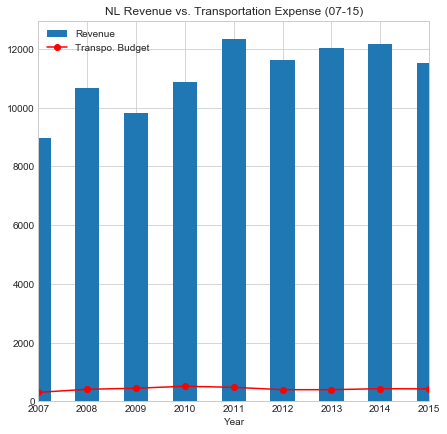

In [129]:
ax = plt.gca()

NL.plot(kind='bar',x='Year',y='Revenue',ax=ax)
NL.plot(kind='line',x='Year',y='Transpo. Budget',color='red',marker='o',ax=ax)

ax.set(title='NL Revenue vs. Transportation Expense (07-15)')

plt.show()

In [130]:
PE = pd.concat([Rev_PE['Revenue'],Expen_PE['VALUE']],axis=1)
PE.columns = ['Revenue','Transpo. Budget']
PE[PE.columns[0:1]] = PE[PE.columns[0:1]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
PE.reset_index(drop=False, inplace=True)

PE

,Year,Revenue,Transpo. Budget
0,2007,2009,106.4
1,2008,1979,114.0
2,2009,2029,124.6
3,2010,2044,121.8
4,2011,2154,127.1
5,2012,2247,121.7
6,2013,2324,108.8
7,2014,2369,114.9
8,2015,2456,119.4


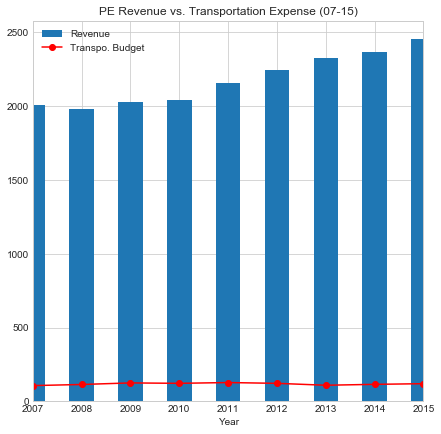

In [131]:
ax = plt.gca()

PE.plot(kind='bar',x='Year',y='Revenue',ax=ax)
PE.plot(kind='line',x='Year',y='Transpo. Budget',color='red',marker='o',ax=ax)

ax.set(title='PE Revenue vs. Transportation Expense (07-15)')

plt.show()

In [132]:
NS = pd.concat([Rev_NS['Revenue'],Expen_NS['VALUE']],axis=1)
NS.columns = ['Revenue','Transpo. Budget']
NS[NS.columns[0:1]] = NS[NS.columns[0:1]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
NS.reset_index(drop=False, inplace=True)

NS

,Year,Revenue,Transpo. Budget
0,2007,14940,356.8
1,2008,14932,408.1
2,2009,15096,420.9
3,2010,15366,520.3
4,2011,16112,602.5
5,2012,16473,603.5
6,2013,16803,624.6
7,2014,17454,653.6
8,2015,18091,653.6


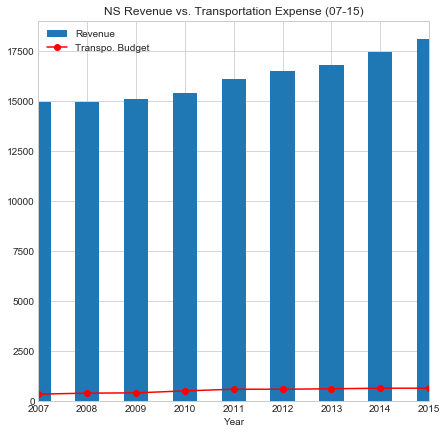

In [133]:
ax = plt.gca()

NS.plot(kind='bar',x='Year',y='Revenue',ax=ax)
NS.plot(kind='line',x='Year',y='Transpo. Budget',color='red',marker='o',ax=ax)
ax.set(title='NS Revenue vs. Transportation Expense (07-15)')
plt.show()

In [134]:
NB = pd.concat([Rev_NB['Revenue'],Expen_NB['VALUE']],axis=1)
NB.columns = ['Revenue','Transpo. Budget']
NB[NB.columns[0:1]] = NB[NB.columns[0:1]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
NB.reset_index(drop=False, inplace=True)

NB

,Year,Revenue,Transpo. Budget
0,2007,10972,925.9
1,2008,11246,533.0
2,2009,11275,559.8
3,2010,11421,629.2
4,2011,11918,441.8
5,2012,12159,900.5
6,2013,12494,391.9
7,2014,12952,411.2
8,2015,13332,506.5


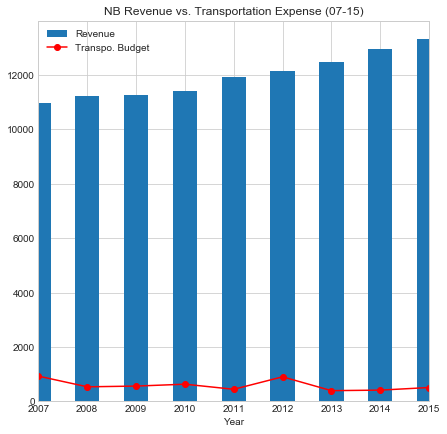

In [135]:
ax = plt.gca()

NB.plot(kind='bar',x='Year',y='Revenue',ax=ax)
NB.plot(kind='line',x='Year',y='Transpo. Budget',color='red',marker='o',ax=ax)
ax.set(title='NB Revenue vs. Transportation Expense (07-15)')
plt.show()

In [136]:
PQ = pd.concat([Rev_PQ['Revenue'],Expen_PQ['VALUE']],axis=1)
PQ.columns = ['Revenue','Transpo. Budget']
PQ[PQ.columns[0:1]] = PQ[PQ.columns[0:1]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
PQ.reset_index(drop=False, inplace=True)

PQ

,Year,Revenue,Transpo. Budget
0,2007,139973,4139.4
1,2008,140200,5335.1
2,2009,138970,4606.3
3,2010,144199,4994.8
4,2011,153799,5259.0
5,2012,159522,7100.5
6,2013,165563,10005.8
7,2014,170970,9604.6
8,2015,178126,10281.1


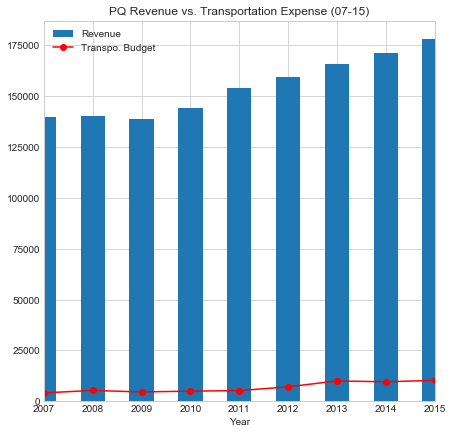

In [137]:
ax = plt.gca()

PQ.plot(kind='bar',x='Year',y='Revenue',ax=ax)
PQ.plot(kind='line',x='Year',y='Transpo. Budget',color='red',marker='o',ax=ax)
ax.set(title='PQ Revenue vs. Transportation Expense (07-15)')
plt.show()

In [138]:
ON = pd.concat([Rev_ON['Revenue'],Expen_ON['VALUE']],axis=1)
ON.columns = ['Revenue','Transpo. Budget']
ON[ON.columns[0:1]] = ON[ON.columns[0:1]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
ON.reset_index(drop=False, inplace=True)

ON

,Year,Revenue,Transpo. Budget
0,2007,244453,5058.8
1,2008,240201,4084.0
2,2009,235360,2521.4
3,2010,239371,2521.3
4,2011,253784,2641.2
5,2012,262612,4164.4
6,2013,269867,4330.7
7,2014,283800,4647.1
8,2015,302791,5339.9


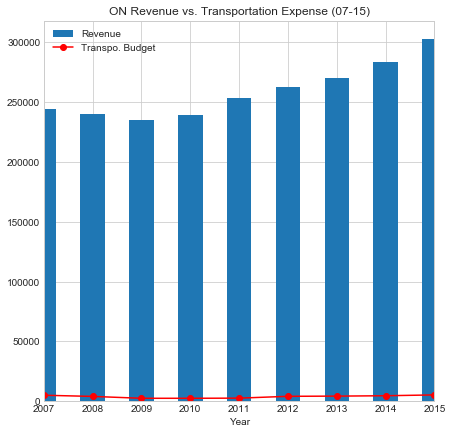

In [139]:
ax = plt.gca()

ON.plot(kind='bar',x='Year',y='Revenue',ax=ax)
ON.plot(kind='line',x='Year',y='Transpo. Budget',color='red',marker='o',ax=ax)
ax.set(title='ON Revenue vs. Transportation Expense (07-15)')
plt.show()

In [140]:
SK = pd.concat([Rev_SK['Revenue'],Expen_SK['VALUE']],axis=1)
SK.columns = ['Revenue','Transpo. Budget']
SK[SK.columns[0:1]] = SK[SK.columns[0:1]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
SK.reset_index(drop=False, inplace=True)

SK

,Year,Revenue,Transpo. Budget
0,2007,21215,439.4
1,2008,24093,598.7
2,2009,22029,574.7
3,2010,22798,599.0
4,2011,24233,598.4
5,2012,25858,582.6
6,2013,26795,626.7
7,2014,27779,693.7
8,2015,27743,790.9


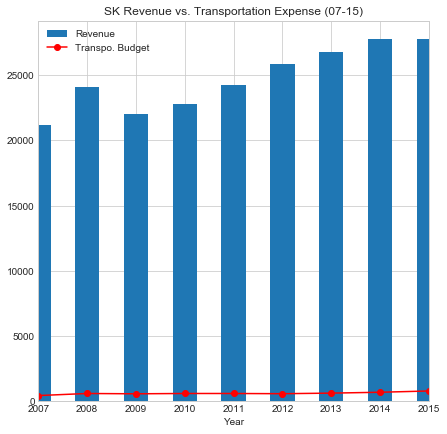

In [141]:
ax = plt.gca()

SK.plot(kind='bar',x='Year',y='Revenue',ax=ax)
SK.plot(kind='line',x='Year',y='Transpo. Budget',color='red',marker='o',ax=ax)
ax.set(title='SK Revenue vs. Transportation Expense (07-15)')
plt.show()

In [142]:
MB = pd.concat([Rev_MB['Revenue'],Expen_MB['VALUE']],axis=1)
MB.columns = ['Revenue','Transpo. Budget']
MB[MB.columns[0:1]] = MB[MB.columns[0:1]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
MB.reset_index(drop=False, inplace=True)

MB

,Year,Revenue,Transpo. Budget
0,2007,19727,511.3
1,2008,19997,540.8
2,2009,19852,662.2
3,2010,20217,591.0
4,2011,21246,582.6
5,2012,22420,602.7
6,2013,23775,646.4
7,2014,24621,810.4
8,2015,25766,943.0


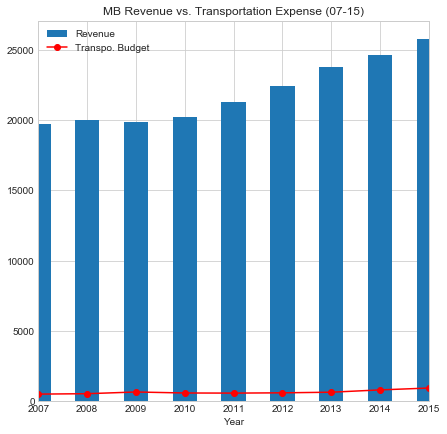

In [143]:
ax = plt.gca()

MB.plot(kind='bar',x='Year',y='Revenue',ax=ax)
MB.plot(kind='line',x='Year',y='Transpo. Budget',color='red',marker='o',ax=ax)
ax.set(title='MB Revenue vs. Transportation Expense (07-15)')
plt.show()

In [144]:
AB = pd.concat([Rev_AB['Revenue'],Expen_AB['VALUE']],axis=1)
AB.columns = ['Revenue','Transpo. Budget']
AB[AB.columns[0:1]] = AB[AB.columns[0:1]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
AB.reset_index(drop=False, inplace=True)

AB

,Year,Revenue,Transpo. Budget
0,2007,91796,1937.9
1,2008,99042,2330.4
2,2009,87627,3160.1
3,2010,90871,2684.9
4,2011,97190,2724.0
5,2012,99714,2588.1
6,2013,109154,2404.4
7,2014,118108,2252.5
8,2015,111730,2489.5


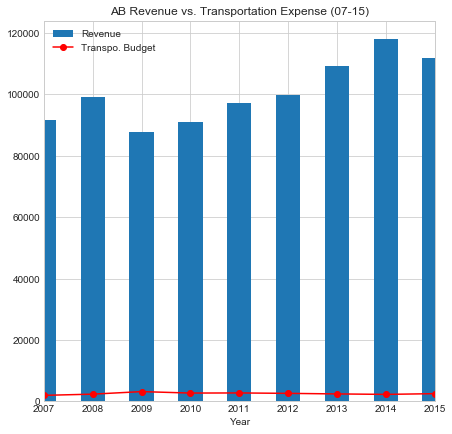

In [145]:
ax = plt.gca()

AB.plot(kind='bar',x='Year',y='Revenue',ax=ax)
AB.plot(kind='line',x='Year',y='Transpo. Budget',color='red',marker='o',ax=ax)
ax.set(title='AB Revenue vs. Transportation Expense (07-15)')
plt.show()

In [146]:
BC = pd.concat([Rev_BC['Revenue'],Expen_BC['VALUE']],axis=1)
BC.columns = ['Revenue','Transpo. Budget']
BC[BC.columns[0:1]] = BC[BC.columns[0:1]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
BC.reset_index(drop=False, inplace=True)

BC

,Year,Revenue,Transpo. Budget
0,2007,79823,2726.2
1,2008,80534,2224.0
2,2009,76616,2306.5
3,2010,78734,2668.8
4,2011,83169,2297.0
5,2012,86137,2371.0
6,2013,90053,2448.5
7,2014,95729,2286.8
8,2015,100735,2337.5


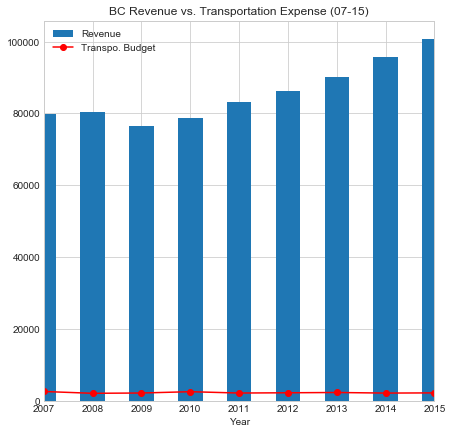

In [147]:
ax = plt.gca()

BC.plot(kind='bar',x='Year',y='Revenue',ax=ax)
BC.plot(kind='line',x='Year',y='Transpo. Budget',color='red',marker='o',ax=ax)
ax.set(title='BC Revenue vs. Transportation Expense (07-15)')
plt.show()

In [148]:
YK = pd.concat([Rev_YK['Revenue'],Expen_YK['VALUE']],axis=1)
YK.columns = ['Revenue','Transpo. Budget']
YK[YK.columns[0:1]] = YK[YK.columns[0:1]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
YK.reset_index(drop=False, inplace=True)

YK

,Year,Revenue,Transpo. Budget
0,2007,559,96.3
1,2008,589,107.6
2,2009,597,116.3
3,2010,609,99.7
4,2011,673,99.3
5,2012,691,113.6
6,2013,725,113.5
7,2014,708,137.0
8,2015,714,137.0


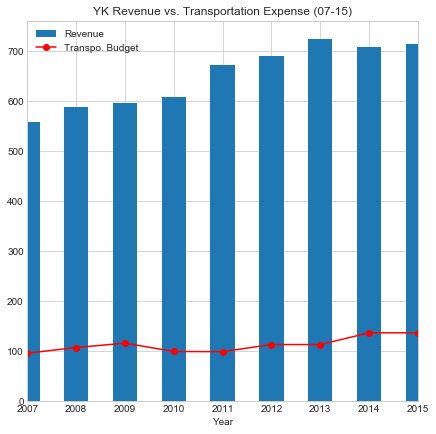

In [149]:
ax = plt.gca()

YK.plot(kind='bar',x='Year',y='Revenue',ax=ax)
YK.plot(kind='line',x='Year',y='Transpo. Budget',color='red',marker='o',ax=ax)
ax.set(title='YK Revenue vs. Transportation Expense (07-15)')
plt.show()

In [150]:
NW = pd.concat([Rev_NW['Revenue'],Expen_NW['VALUE']],axis=1)
NW.columns = ['Revenue','Transpo. Budget']
NW[NW.columns[0:1]] = NW[NW.columns[0:1]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
NW.reset_index(drop=False, inplace=True)

NW

,Year,Revenue,Transpo. Budget
0,2007,1339,98.9
1,2008,1399,125.2
2,2009,1315,164.9
3,2010,1317,352.8
4,2011,1495,210.4
5,2012,1446,204.9
6,2013,1376,260.9
7,2014,1463,349.0
8,2015,1464,324.9


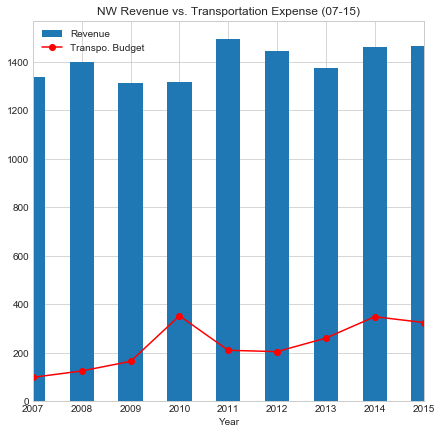

In [151]:
ax = plt.gca()

NW.plot(kind='bar',x='Year',y='Revenue',ax=ax)
NW.plot(kind='line',x='Year',y='Transpo. Budget',color='red',marker='o',ax=ax)
ax.set(title='NW Revenue vs. Transportation Expense (07-15)')
plt.show()

In [152]:
NU = pd.concat([Rev_NU['Revenue'],Expen_NU['VALUE']],axis=1)
NU.columns = ['Revenue','Transpo. Budget']
NU[NU.columns[0:1]] = NU[NU.columns[0:1]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
NU.reset_index(drop=False, inplace=True)

NU

,Year,Revenue,Transpo. Budget
0,2007,435,47.6
1,2008,411,45.8
2,2009,441,33.2
3,2010,503,40.1
4,2011,568,39.2
5,2012,585,59.8
6,2013,591,123.7
7,2014,626,91.2
8,2015,652,126.6


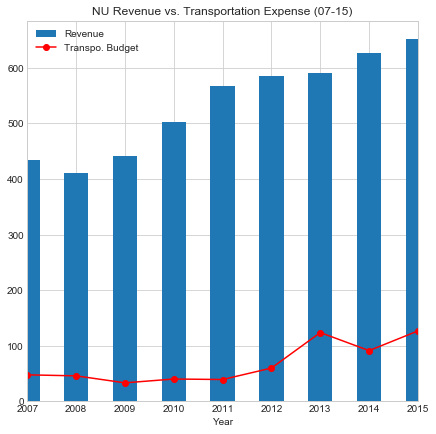

In [153]:
ax = plt.gca()

NU.plot(kind='bar',x='Year',y='Revenue',ax=ax)
NU.plot(kind='line',x='Year',y='Transpo. Budget',color='red',marker='o',ax=ax)
ax.set(title='NU Revenue vs. Transportation Expense (07-15)')
plt.show()

In [154]:
Mean_rev = pd.DataFrame({'Province':['NL','PE','NS','NB','SK','MB','AB','PQ','ON','BC','YK','NW','NU'],
                         'Mean Rev.':[NL['Revenue'].mean(),PE['Revenue'].mean(),NS['Revenue'].mean(),
                                      NB['Revenue'].mean(),SK['Revenue'].mean(),MB['Revenue'].mean(),
                                      AB['Revenue'].mean(),PQ['Revenue'].mean(),ON['Revenue'].mean(),
                                      BC['Revenue'].mean(),YK['Revenue'].mean(),NW['Revenue'].mean(),
                                      NU['Revenue'].mean()],
                        'Mean Transpo. Budget':[NL['Transpo. Budget'].mean(),PE['Transpo. Budget'].mean(),
                                                NS['Transpo. Budget'].mean(),NB['Transpo. Budget'].mean(),
                                                SK['Transpo. Budget'].mean(),MB['Transpo. Budget'].mean(),
                                                AB['Transpo. Budget'].mean(),PQ['Transpo. Budget'].mean(),
                                                ON['Transpo. Budget'].mean(),BC['Transpo. Budget'].mean(),
                                                YK['Transpo. Budget'].mean(),NW['Transpo. Budget'].mean(),
                                                NU['Transpo. Budget'].mean()]})
Mean_rev

,Province,Mean Rev.,Mean Transpo. Budget
0,NL,11111.777778,421.188889
1,PE,2179.000000,117.633333
2,NS,16140.777778,538.211111
3,NB,11974.333333,588.866667
4,SK,24727.000000,611.566667
5,MB,21957.888889,654.488889
6,AB,100581.333333,2507.977778
7,PQ,154591.333333,6814.066667
8,ON,259137.666667,3923.200000
9,BC,85725.555556,2407.366667


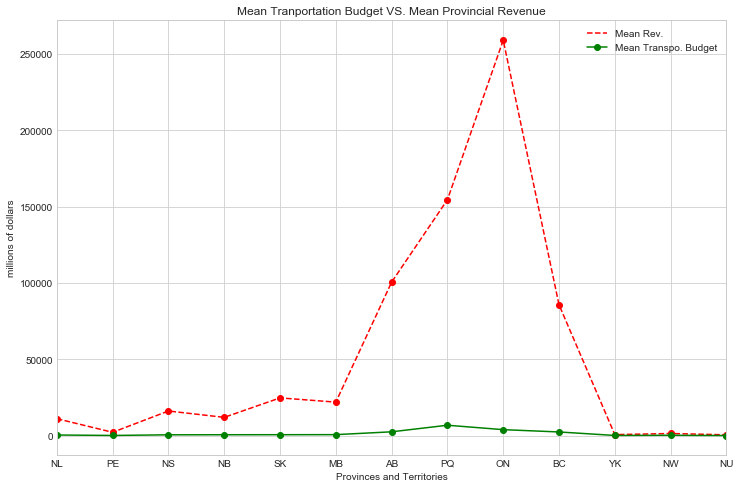

In [155]:
positions = list(range(len(Mean_rev.index)))


fix, ax = plt.subplots(figsize=(12,8))
Mean_rev.plot(kind='line',x='Province',y='Mean Rev.',linestyle='--',color='red',marker='o',ax=ax)
Mean_rev.plot(kind='line',x='Province',y='Mean Transpo. Budget',color='green',marker='o',ax=ax)
ax.set(title = 'Mean Tranportation Budget VS. Mean Provincial Revenue',
       ylabel = 'millions of dollars', xlabel = "Provinces and Territories")
plt.xticks(list(range(len(Mean_rev.index))), Mean_rev['Province'], fontsize=10)
plt.show()

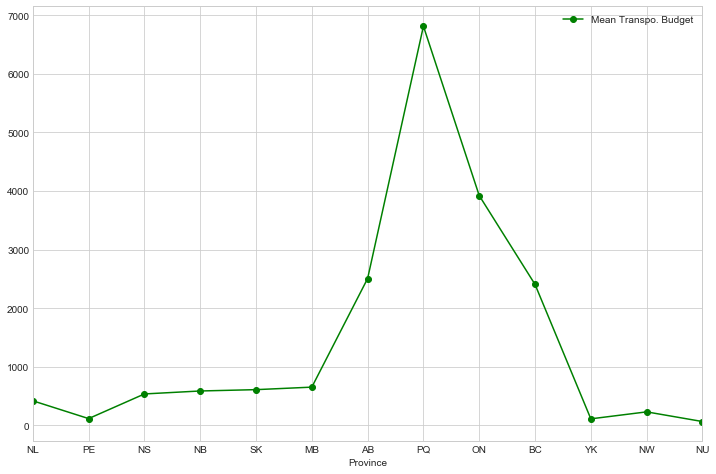

In [156]:
Mean_rev.plot(kind='line',x='Province',y='Mean Transpo. Budget',color='green',marker='o',figsize=(12,8))
plt.xticks(list(range(len(Mean_rev.index))), Mean_rev['Province'], fontsize=10)
plt.show()

##  the most cost-effective tranportation?

In [157]:
Expen_PCapita= data2[data2['Statistics'].str.match('Per capita transport expenditures')]
Expen_PCapita.head(20)    

,REF_DATE,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
2,2006/2007,Canada,Per capita transport expenditures,Dollars,units,416.8
5,2006/2007,Newfoundland and Labrador,Per capita transport expenditures,Dollars,units,549.3
8,2006/2007,Prince Edward Island,Per capita transport expenditures,Dollars,units,668.3
11,2006/2007,Nova Scotia,Per capita transport expenditures,Dollars,units,424.2
14,2006/2007,New Brunswick,Per capita transport expenditures,Dollars,units,574.8
17,2006/2007,Quebec,Per capita transport expenditures,Dollars,units,455.5
20,2006/2007,Ontario,Per capita transport expenditures,Dollars,units,322.7
23,2006/2007,Manitoba,Per capita transport expenditures,Dollars,units,311.6
26,2006/2007,Saskatchewan,Per capita transport expenditures,Dollars,units,349.2
29,2006/2007,Alberta,Per capita transport expenditures,Dollars,units,406.3


In [158]:
Expen_PCapita=Expen_PCapita[14:140]
Expen_PCapita

,REF_DATE,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
44,2007/2008,Canada,Per capita transport expenditures,Dollars,units,507.6
47,2007/2008,Newfoundland and Labrador,Per capita transport expenditures,Dollars,units,597.8
50,2007/2008,Prince Edward Island,Per capita transport expenditures,Dollars,units,770.5
53,2007/2008,Nova Scotia,Per capita transport expenditures,Dollars,units,381.5
56,2007/2008,New Brunswick,Per capita transport expenditures,Dollars,units,1241.0
...,...,...,...,...,...,...
407,2015/2016,Alberta,Per capita transport expenditures,Dollars,units,592.5
410,2015/2016,British Columbia,Per capita transport expenditures,Dollars,units,495.9
413,2015/2016,Yukon,Per capita transport expenditures,Dollars,units,3679.3
416,2015/2016,Northwest Territories,Per capita transport expenditures,Dollars,units,7317.8


In [159]:
Expen_PCapita['REF_DATE'].replace({"2007/2008":"2007","2008/2009":"2008","2009/2010":"2009",
                                 "2010/2011":"2010","2011/2012":"2011","2012/2013":"2012",
                                 "2013/2014":"2013","2014/2015":"2014","2015/2016":"2015"},inplace=True)
Expen_PCapita

,REF_DATE,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
44,2007,Canada,Per capita transport expenditures,Dollars,units,507.6
47,2007,Newfoundland and Labrador,Per capita transport expenditures,Dollars,units,597.8
50,2007,Prince Edward Island,Per capita transport expenditures,Dollars,units,770.5
53,2007,Nova Scotia,Per capita transport expenditures,Dollars,units,381.5
56,2007,New Brunswick,Per capita transport expenditures,Dollars,units,1241.0
...,...,...,...,...,...,...
407,2015,Alberta,Per capita transport expenditures,Dollars,units,592.5
410,2015,British Columbia,Per capita transport expenditures,Dollars,units,495.9
413,2015,Yukon,Per capita transport expenditures,Dollars,units,3679.3
416,2015,Northwest Territories,Per capita transport expenditures,Dollars,units,7317.8


In [160]:
Methods_Transpo = pd.DataFrame({'Province':['NL','PE','NS','NB','SK','MB','AB','PQ','ON','BC','YK','NW','NU'],
                                'Air':['YES','YES','YES','YES','YES','YES','YES','YES','YES','YES','YES','YES','YES'],
                                'Railway':['NO','YES','YES','NO','YES','YES','YES','YES','YES','YES','YES','NO','NO'],
                                'Bus':['YES','YES','YES','YES','YES','YES','YES','YES','YES','YES','YES','YES','NO'],
                                'Ferry':['YES','YES','YES','YES','YES','YES','YES','YES','YES','YES','YES','YES','NO'],
                                'Taxi':['YES','YES','YES','YES','YES','YES','YES','YES','YES','YES','YES','YES','YES'],
                                'Cycling':['NO','YES','YES','NO','YES','YES','YES','YES','YES','YES','NO','NO','NO']})
Methods_Transpo

,Province,Air,Railway,Bus,Ferry,Taxi,Cycling
0,NL,YES,NO,YES,YES,YES,NO
1,PE,YES,YES,YES,YES,YES,YES
2,NS,YES,YES,YES,YES,YES,YES
3,NB,YES,NO,YES,YES,YES,NO
4,SK,YES,YES,YES,YES,YES,YES
5,MB,YES,YES,YES,YES,YES,YES
6,AB,YES,YES,YES,YES,YES,YES
7,PQ,YES,YES,YES,YES,YES,YES
8,ON,YES,YES,YES,YES,YES,YES
9,BC,YES,YES,YES,YES,YES,YES


Source:https://www.canada.ca/en/immigration-refugees-citizenship/services/new-immigrants/new-life-canada/driving/other-transportation.html

https://en.wikipedia.org/wiki/Transportation_in_Canada

In [161]:
Expen_PC_NL = Expen_PCapita[Expen_PCapita['GEO'].str.match('Newfoundland')]
Expen_PC_NL.set_index('REF_DATE',inplace=True)
Expen_PC_NL.index.names=['Year']
Expen_PC_NL

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Newfoundland and Labrador,Per capita transport expenditures,Dollars,units,597.8
2008,Newfoundland and Labrador,Per capita transport expenditures,Dollars,units,797.0
2009,Newfoundland and Labrador,Per capita transport expenditures,Dollars,units,857.4
2010,Newfoundland and Labrador,Per capita transport expenditures,Dollars,units,979.6
2011,Newfoundland and Labrador,Per capita transport expenditures,Dollars,units,905.7
2012,Newfoundland and Labrador,Per capita transport expenditures,Dollars,units,750.2
2013,Newfoundland and Labrador,Per capita transport expenditures,Dollars,units,748.6
2014,Newfoundland and Labrador,Per capita transport expenditures,Dollars,units,812.3
2015,Newfoundland and Labrador,Per capita transport expenditures,Dollars,units,797.9


In [162]:
Coefficient_NL = Expen_PC_NL['VALUE'].mean()/4
Coefficient_NL

201.29166666666666

In [163]:
Expen_PC_PE = Expen_PCapita[Expen_PCapita['GEO'].str.match('Prince')]
Expen_PC_PE.set_index('REF_DATE',inplace=True)
Expen_PC_PE.index.names=['Year']
Expen_PC_PE

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Prince Edward Island,Per capita transport expenditures,Dollars,units,770.5
2008,Prince Edward Island,Per capita transport expenditures,Dollars,units,817.3
2009,Prince Edward Island,Per capita transport expenditures,Dollars,units,885.9
2010,Prince Edward Island,Per capita transport expenditures,Dollars,units,853.0
2011,Prince Edward Island,Per capita transport expenditures,Dollars,units,879.7
2012,Prince Edward Island,Per capita transport expenditures,Dollars,units,838.1
2013,Prince Edward Island,Per capita transport expenditures,Dollars,units,748.8
2014,Prince Edward Island,Per capita transport expenditures,Dollars,units,785.8
2015,Prince Edward Island,Per capita transport expenditures,Dollars,units,812.3


In [164]:
Coefficient_PE = Expen_PC_PE['VALUE'].mean()/4
Coefficient_PE

205.3166666666667

In [165]:
Expen_PC_NS = Expen_PCapita[Expen_PCapita['GEO'].str.match('Nova')]
Expen_PC_NS.set_index('REF_DATE',inplace=True)
Expen_PC_NS.index.names=['Year']
Expen_PC_NS

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Nova Scotia,Per capita transport expenditures,Dollars,units,381.5
2008,Nova Scotia,Per capita transport expenditures,Dollars,units,435.5
2009,Nova Scotia,Per capita transport expenditures,Dollars,units,447.5
2010,Nova Scotia,Per capita transport expenditures,Dollars,units,551.1
2011,Nova Scotia,Per capita transport expenditures,Dollars,units,637.4
2012,Nova Scotia,Per capita transport expenditures,Dollars,units,638.6
2013,Nova Scotia,Per capita transport expenditures,Dollars,units,662.0
2014,Nova Scotia,Per capita transport expenditures,Dollars,units,692.3
2015,Nova Scotia,Per capita transport expenditures,Dollars,units,691.5


In [166]:
Coefficient_NS = Expen_PC_NS['VALUE'].mean()/6
Coefficient_NS

95.13703703703703

In [167]:
Expen_PC_NB = Expen_PCapita[Expen_PCapita['GEO'].str.match('New Brunswick')]
Expen_PC_NB.set_index('REF_DATE',inplace=True)
Expen_PC_NB.index.names=['Year']
Expen_PC_NB

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,New Brunswick,Per capita transport expenditures,Dollars,units,1241.0
2008,New Brunswick,Per capita transport expenditures,Dollars,units,712.8
2009,New Brunswick,Per capita transport expenditures,Dollars,units,745.3
2010,New Brunswick,Per capita transport expenditures,Dollars,units,834.2
2011,New Brunswick,Per capita transport expenditures,Dollars,units,584.6
2012,New Brunswick,Per capita transport expenditures,Dollars,units,1189.9
2013,New Brunswick,Per capita transport expenditures,Dollars,units,518.6
2014,New Brunswick,Per capita transport expenditures,Dollars,units,544.4
2015,New Brunswick,Per capita transport expenditures,Dollars,units,671.4


In [168]:
Coefficient_NB = Expen_PC_NB['VALUE'].mean()/6
Coefficient_NB

130.41111111111113

In [169]:
Expen_PC_SK = Expen_PCapita[Expen_PCapita['GEO'].str.match('Sas')]
Expen_PC_SK.set_index('REF_DATE',inplace=True)
Expen_PC_SK.index.names=['Year']
Expen_PC_SK

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Saskatchewan,Per capita transport expenditures,Dollars,units,436.2
2008,Saskatchewan,Per capita transport expenditures,Dollars,units,585.5
2009,Saskatchewan,Per capita transport expenditures,Dollars,units,552.9
2010,Saskatchewan,Per capita transport expenditures,Dollars,units,567.2
2011,Saskatchewan,Per capita transport expenditures,Dollars,units,558.8
2012,Saskatchewan,Per capita transport expenditures,Dollars,units,533.6
2013,Saskatchewan,Per capita transport expenditures,Dollars,units,564.7
2014,Saskatchewan,Per capita transport expenditures,Dollars,units,616.6
2015,Saskatchewan,Per capita transport expenditures,Dollars,units,695.4


In [170]:
Coefficient_SK = Expen_PC_SK['VALUE'].mean()/6
Coefficient_SK

94.64629629629631

In [171]:
Expen_PC_MB = Expen_PCapita[Expen_PCapita['GEO'].str.match('Manitoba')]
Expen_PC_MB.set_index('REF_DATE',inplace=True)
Expen_PC_MB.index.names=['Year']
Expen_PC_MB

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Manitoba,Per capita transport expenditures,Dollars,units,429.1
2008,Manitoba,Per capita transport expenditures,Dollars,units,450.8
2009,Manitoba,Per capita transport expenditures,Dollars,units,546.4
2010,Manitoba,Per capita transport expenditures,Dollars,units,482.5
2011,Manitoba,Per capita transport expenditures,Dollars,units,470.7
2012,Manitoba,Per capita transport expenditures,Dollars,units,480.3
2013,Manitoba,Per capita transport expenditures,Dollars,units,509.1
2014,Manitoba,Per capita transport expenditures,Dollars,units,630.3
2015,Manitoba,Per capita transport expenditures,Dollars,units,724.6


In [172]:
Coefficient_MB = Expen_PC_MB['VALUE'].mean()/6
Coefficient_MB

87.47777777777777

In [173]:
Expen_PC_AB = Expen_PCapita[Expen_PCapita['GEO'].str.match('Alberta')]
Expen_PC_AB.set_index('REF_DATE',inplace=True)
Expen_PC_AB.index.names=['Year']
Expen_PC_AB

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Alberta,Per capita transport expenditures,Dollars,units,548.5
2008,Alberta,Per capita transport expenditures,Dollars,units,643.9
2009,Alberta,Per capita transport expenditures,Dollars,units,855.3
2010,Alberta,Per capita transport expenditures,Dollars,units,716.5
2011,Alberta,Per capita transport expenditures,Dollars,units,715.5
2012,Alberta,Per capita transport expenditures,Dollars,units,662.1
2013,Alberta,Per capita transport expenditures,Dollars,units,596.8
2014,Alberta,Per capita transport expenditures,Dollars,units,544.9
2015,Alberta,Per capita transport expenditures,Dollars,units,592.5


In [174]:
Coefficient_AB = Expen_PC_AB['VALUE'].mean()/6
Coefficient_AB

108.81481481481482

In [175]:
Expen_PC_PQ = Expen_PCapita[Expen_PCapita['GEO'].str.match('Quebec')]
Expen_PC_PQ.set_index('REF_DATE',inplace=True)
Expen_PC_PQ.index.names=['Year']
Expen_PC_PQ

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Quebec,Per capita transport expenditures,Dollars,units,536.7
2008,Quebec,Per capita transport expenditures,Dollars,units,685.2
2009,Quebec,Per capita transport expenditures,Dollars,units,585.2
2010,Quebec,Per capita transport expenditures,Dollars,units,627.9
2011,Quebec,Per capita transport expenditures,Dollars,units,654.8
2012,Quebec,Per capita transport expenditures,Dollars,units,875.7
2013,Quebec,Per capita transport expenditures,Dollars,units,1224.1
2014,Quebec,Per capita transport expenditures,Dollars,units,1166.3
2015,Quebec,Per capita transport expenditures,Dollars,units,1241.8


In [176]:
Coefficient_PQ = Expen_PC_PQ['VALUE'].mean()/6
Coefficient_PQ

140.69814814814816

In [177]:
Expen_PC_ON = Expen_PCapita[Expen_PCapita['GEO'].str.match('Ontario')]
Expen_PC_ON.set_index('REF_DATE',inplace=True)
Expen_PC_ON.index.names=['Year']
Expen_PC_ON

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Ontario,Per capita transport expenditures,Dollars,units,395.0
2008,Ontario,Per capita transport expenditures,Dollars,units,315.9
2009,Ontario,Per capita transport expenditures,Dollars,units,193.3
2010,Ontario,Per capita transport expenditures,Dollars,units,191.2
2011,Ontario,Per capita transport expenditures,Dollars,units,198.3
2012,Ontario,Per capita transport expenditures,Dollars,units,309.3
2013,Ontario,Per capita transport expenditures,Dollars,units,318.2
2014,Ontario,Per capita transport expenditures,Dollars,units,338.3
2015,Ontario,Per capita transport expenditures,Dollars,units,385.4


In [178]:
Coefficient_ON = Expen_PC_ON['VALUE'].mean()/6
Coefficient_ON

48.979629629629635

In [179]:
Expen_PC_BC = Expen_PCapita[Expen_PCapita['GEO'].str.match('British')]
Expen_PC_BC.set_index('REF_DATE',inplace=True)
Expen_PC_BC.index.names=['Year']
Expen_PC_BC

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,British Columbia,Per capita transport expenditures,Dollars,units,632.2
2008,British Columbia,Per capita transport expenditures,Dollars,units,508.8
2009,British Columbia,Per capita transport expenditures,Dollars,units,520.5
2010,British Columbia,Per capita transport expenditures,Dollars,units,595.2
2011,British Columbia,Per capita transport expenditures,Dollars,units,508.2
2012,British Columbia,Per capita transport expenditures,Dollars,units,519.4
2013,British Columbia,Per capita transport expenditures,Dollars,units,530.8
2014,British Columbia,Per capita transport expenditures,Dollars,units,489.6
2015,British Columbia,Per capita transport expenditures,Dollars,units,495.9


In [180]:
Coefficient_BC = Expen_PC_BC['VALUE'].mean()/6
Coefficient_BC

88.89999999999999

In [181]:
Expen_PC_YK = Expen_PCapita[Expen_PCapita['GEO'].str.match('Yukon')]
Expen_PC_YK.set_index('REF_DATE',inplace=True)
Expen_PC_YK.index.names=['Year']
Expen_PC_YK

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Yukon,Per capita transport expenditures,Dollars,units,2948.6
2008,Yukon,Per capita transport expenditures,Dollars,units,3231.6
2009,Yukon,Per capita transport expenditures,Dollars,units,3419.2
2010,Yukon,Per capita transport expenditures,Dollars,units,2865.2
2011,Yukon,Per capita transport expenditures,Dollars,units,2793.3
2012,Yukon,Per capita transport expenditures,Dollars,units,3135.0
2013,Yukon,Per capita transport expenditures,Dollars,units,3134.5
2014,Yukon,Per capita transport expenditures,Dollars,units,3701.5
2015,Yukon,Per capita transport expenditures,Dollars,units,3679.3


In [182]:
Coefficient_YK = Expen_PC_YK['VALUE'].mean()/5
Coefficient_YK

642.4044444444444

In [183]:
Expen_PC_NW = Expen_PCapita[Expen_PCapita['GEO'].str.match('Northwest')]
Expen_PC_NW.set_index('REF_DATE',inplace=True)
Expen_PC_NW.index.names=['Year']
Expen_PC_NW

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Northwest Territories,Per capita transport expenditures,Dollars,units,2286.7
2008,Northwest Territories,Per capita transport expenditures,Dollars,units,2891.8
2009,Northwest Territories,Per capita transport expenditures,Dollars,units,3841.9
2010,Northwest Territories,Per capita transport expenditures,Dollars,units,8148.6
2011,Northwest Territories,Per capita transport expenditures,Dollars,units,4832.9
2012,Northwest Territories,Per capita transport expenditures,Dollars,units,4697.2
2013,Northwest Territories,Per capita transport expenditures,Dollars,units,5969.5
2014,Northwest Territories,Per capita transport expenditures,Dollars,units,7920.8
2015,Northwest Territories,Per capita transport expenditures,Dollars,units,7317.8


In [184]:
Coefficient_NW = Expen_PC_NW['VALUE'].mean()/4
Coefficient_NW

1330.7555555555557

In [185]:
Expen_PC_NU = Expen_PCapita[Expen_PCapita['GEO'].str.match('Nunavut')]
Expen_PC_NU.set_index('REF_DATE',inplace=True)
Expen_PC_NU.index.names=['Year']
Expen_PC_NU

,GEO,Statistics,UOM,SCALAR_FACTOR,VALUE
Year,,,,,
2007,Nunavut,Per capita transport expenditures,Dollars,units,1508.1
2008,Nunavut,Per capita transport expenditures,Dollars,units,1434.0
2009,Nunavut,Per capita transport expenditures,Dollars,units,1012.4
2010,Nunavut,Per capita transport expenditures,Dollars,units,1193.3
2011,Nunavut,Per capita transport expenditures,Dollars,units,1140.5
2012,Nunavut,Per capita transport expenditures,Dollars,units,1714.2
2013,Nunavut,Per capita transport expenditures,Dollars,units,3474.0
2014,Nunavut,Per capita transport expenditures,Dollars,units,2520.9
2015,Nunavut,Per capita transport expenditures,Dollars,units,3453.5


In [186]:
Coefficient_NU = Expen_PC_NU['VALUE'].mean()/2
Coefficient_NU

969.4944444444445

In [187]:
Most_efficient = pd.DataFrame({'Province':['NL','PE','NS','NB','SK','MB','AB','PQ','ON','BC','YK','NW','NU'],
                               'Coefficient':[Coefficient_NL,Coefficient_PE,Coefficient_NS,Coefficient_NB
                                              ,Coefficient_SK,Coefficient_MB,Coefficient_AB,Coefficient_PQ
                                              ,Coefficient_ON,Coefficient_BC,Coefficient_YK,Coefficient_NW
                                              ,Coefficient_NU]})
Most_efficient.sort_values(by=['Coefficient'],inplace=True)

In [188]:
Most_efficient

,Province,Coefficient
8,ON,48.979630
5,MB,87.477778
9,BC,88.900000
4,SK,94.646296
2,NS,95.137037
6,AB,108.814815
3,NB,130.411111
7,PQ,140.698148
0,NL,201.291667
1,PE,205.316667


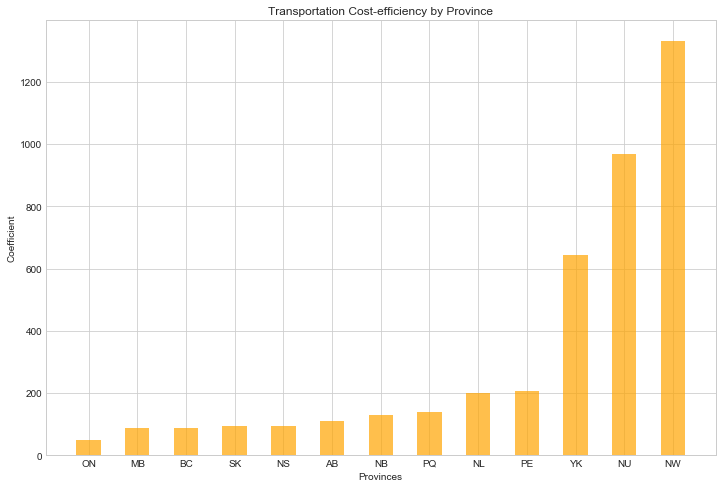

In [192]:
positions = list(range(len(Most_efficient.index)))


fix, ax = plt. subplots(figsize=(12,8))

plt.bar(positions,Most_efficient['Coefficient'],width,
        color='orange',alpha=0.7,label='Cost_efficiency Per Province')

ax.set(title='Transportation Cost-efficiency by Province',ylabel= 'Coefficient',
       xlabel = "Provinces")
plt.xticks(list(range(len(Most_efficient.index))), Most_efficient['Province'], fontsize=10)

plt.show()